<a href="https://colab.research.google.com/github/DifferentiableUniverseInitiative/jax_cosmo/blob/master/notebooks/Cosmology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo cosmology module of jax_cosmo

In [1]:
!pip install git+https://github.com/DifferentiableUniverseInitiative/jax_cosmo

  Cloning https://github.com/DifferentiableUniverseInitiative/jax_cosmo to /tmp/pip-req-build-ynbiuuok
  Running command git clone -q https://github.com/DifferentiableUniverseInitiative/jax_cosmo /tmp/pip-req-build-ynbiuuok
  Created wheel for jax-cosmo: filename=jax_cosmo-0.0.1-cp36-none-any.whl size=10744 sha256=029bcb7f21257e7540f46808abecf373f98fd6cfe75515c9aa11837a3ba115a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-4ia8lidn/wheels/2b/a5/1f/8a5a82ece15d8184742b144dbc65b56bbd60595ddf1add26d5
Successfully built jax-cosmo


In [1]:
%pylab inline
import jax
import jax.numpy as np
from jax_cosmo.cosmology import cosmology

Populating the interactive namespace from numpy and matplotlib


In [0]:
cosmo = cosmology()

In [3]:
# Get a k array
k = np.logspace(-3,0)
# Compute transfer function
t = cosmo.T(k)
# Compute the linear power spectrum, minus the growth part
pk = cosmo.pk_prim(k) *  t**2

/usr/local/lib/python3.6/dist-packages/jax/lax/lax.py:5104: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/usr/local/lib/python3.6/dist-packages/jax/lax/lax.py:5104: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


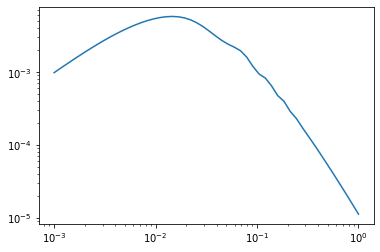

In [4]:
loglog(k, pk)

\o/ Fantastic!

In [0]:
# Now let's try to compute some gradients :-D
def get_pk_loss(Omega_m):
    cosmo.update(Omega_m=Omega_m)
    return np.sum((cosmo.pk_prim(k) * cosmo.T(k)**2 - pk)**2)

In [6]:
grad_pk_loss = jax.grad(get_pk_loss)
grad_pk_loss(0.3)

DeviceArray(0.00109025, dtype=float32)

In [0]:
# Let's try some manual gradient descent
om = 0.2
cosmo.update(Omega_m=0.2)

pks = []
for i in range(10):
    om -= 10*grad_pk_loss(om)
    pks.append(cosmo.pk_prim(k) * cosmo.T(k)**2)

In [0]:
t = cosmo.T(k)
# Compute the linear power spectrum, minus the growth part
pkrec = cosmo.pk_prim(k) *  t**2

Text(0.5, 0, 'k')

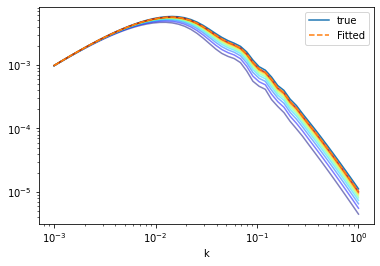

In [9]:
import matplotlib.pylab as plt
colors = plt.cm.jet(np.linspace(0,1,10))

loglog(k, pk, label='true')
for i,v in enumerate(pks):
    loglog(k, v.primal, color=colors[i],alpha=0.5)
loglog(k, pkrec.primal, '--', label='Fitted')
legend()
xlabel('k')